### Import neccessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## Load dataset 

In [2]:
files = ["countrylanguage.csv", "city.csv", "country.csv"]
datas = {file: pd.read_csv(file) for file in files}


### Accessing city data

In [3]:
city = datas["city.csv"]
city.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [4]:
city = city.drop_duplicates()

### Rename columns 

In [5]:
city = city.rename(columns={
    'Name': 'City_Name',
    'Population':"City_population",
})
city.head()

,ID,City_Name,CountryCode,District,City_population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


### Accessing Country data

In [6]:
country = datas["country.csv"]
country.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


## Remove duplicates

In [7]:
country = country.drop_duplicates()

#### Renaming Columns

In [8]:
country = country.rename(columns = {
    "Name": "Country_Name",
    "Population": "Country_population",
    })
country.head()

,Code,Country_Name,Continent,Region,SurfaceArea,IndepYear,Country_population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


### Acccesing  Country Language

In [9]:
countryLanguage = datas["countrylanguage.csv"]
countryLanguage.head()

,CountryCode,Language,IsOfficial,Percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9


In [10]:
countryLanguage = countryLanguage.drop_duplicates()

### Merge Country and city

In [11]:
city_country = pd.merge(
    city,
    country,
    left_on="CountryCode",
    right_on="Code",
    how="inner"
)
city_country.head()

,ID,City_Name,CountryCode,District,City_population,Code,Country_Name,Continent,Region,SurfaceArea,IndepYear,Country_population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
1,2,Qandahar,AFG,Qandahar,237500,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,3,Herat,AFG,Herat,186800,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
3,4,Mazar-e-Sharif,AFG,Balkh,127800,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
4,5,Amsterdam,NLD,Noord-Holland,731200,NLD,Netherlands,Europe,Western Europe,41526.0,1581.0,15864000,78.3,371362.0,360478.0,Nederland,Constitutional Monarchy,Beatrix,5.0,NL


#### Merge countrylanguage to citycountry

In [12]:
data = pd.merge(
    city_country,
    countryLanguage,
    on="CountryCode",
    how="inner"
)
data.head()

,ID,City_Name,CountryCode,District,City_population,Code,Country_Name,Continent,Region,SurfaceArea,...,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,Language,IsOfficial,Percentage
0,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Balochi,F,0.9
1,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Dari,T,32.1
2,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Pashto,T,52.4
3,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Turkmenian,F,1.9
4,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Uzbek,F,8.8


### let us check the data types

In [13]:
data.dtypes

ID                      int64
City_Name              object
CountryCode            object
District               object
City_population         int64
Code                   object
Country_Name           object
Continent              object
Region                 object
SurfaceArea           float64
IndepYear             float64
Country_population      int64
LifeExpectancy        float64
GNP                   float64
GNPOld                float64
LocalName              object
GovernmentForm         object
HeadOfState            object
Capital               float64
Code2                  object
Language               object
IsOfficial             object
Percentage            float64
dtype: object

### Check null values on the data

In [14]:
data.isnull().sum()

ID                      0
City_Name               0
CountryCode             0
District               21
City_population         0
Code                    0
Country_Name            0
Continent               0
Region                  0
SurfaceArea             0
IndepYear             139
Country_population      0
LifeExpectancy         18
GNP                     0
GNPOld                507
LocalName               0
GovernmentForm          0
HeadOfState             6
Capital                 0
Code2                   8
Language                0
IsOfficial              0
Percentage              0
dtype: int64

###  Total number of countries 

In [15]:
Total_countries = data["CountryCode"].nunique()
print(f"We have a total of : {Total_countries} Countries in the world")

We have a total of : 232 Countries in the world


## Remove dublicates 

In [16]:
data = data.drop_duplicates(subset=['ID'])
data.head()

,ID,City_Name,CountryCode,District,City_population,Code,Country_Name,Continent,Region,SurfaceArea,...,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2,Language,IsOfficial,Percentage
0,1,Kabul,AFG,Kabol,1780000,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Balochi,F,0.9
5,2,Qandahar,AFG,Qandahar,237500,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Balochi,F,0.9
10,3,Herat,AFG,Herat,186800,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Balochi,F,0.9
15,4,Mazar-e-Sharif,AFG,Balkh,127800,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,...,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF,Balochi,F,0.9
20,5,Amsterdam,NLD,Noord-Holland,731200,NLD,Netherlands,Europe,Western Europe,41526.0,...,371362.0,360478.0,Nederland,Constitutional Monarchy,Beatrix,5.0,NL,Arabic,F,0.9


### Total number of continets in the world

In [17]:
Total_number_of_continets= data["Continent"].nunique()
print(f"We have a total of {Total_number_of_continets} continents in the world")

We have a total of 6 continents in the world


### Number of cities in the world

In [18]:
Total_number_of_cities= data["City_Name"].nunique()
print(f"We have a total of {Total_number_of_cities} cities in the world")   

We have a total of 4001 cities in the world


### Total Languages in the world 

In [19]:
Total_languages =data["Language"].nunique()
print(f"We have a total of {Total_languages} languages in the world")

We have a total of 95 languages in the world


### Number of countries per continet

In [20]:
number_of_countries_per_continent = (
    data.groupby("Continent")["Country_Name"]
        .nunique()
        .reset_index(name="Number_of_Countries")
)
print(number_of_countries_per_continent)

       Continent  Number_of_Countries
0         Africa                   57
1           Asia                   51
2         Europe                   46
3  North America                   37
4        Oceania                   27
5  South America                   14


### Visualise number of countries per continet in a bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

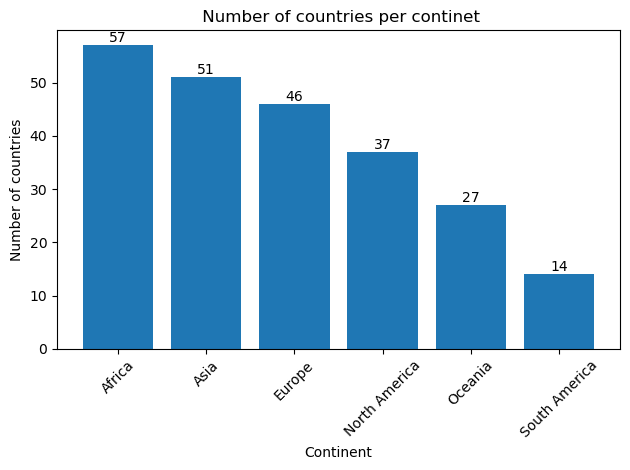

In [21]:
plt.figure()
bars= plt.bar(number_of_countries_per_continent["Continent"],
        number_of_countries_per_continent["Number_of_Countries"]
                                            )
plt.xlabel("Continent"),
plt.ylabel("Number of countries"),
plt.title(" Number of countries per continet")

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        int(height),
        ha='center',
        va='bottom'
    )


plt.xticks(rotation=45)
plt.tight_layout()
plt.show


### Number of official Languages  by per continet 

In [22]:
no_of_languages_per_continent = (
    data[data["IsOfficial"] == "T"]
        .groupby("Continent")["Language"]
        .nunique()
)
print(no_of_languages_per_continent)

Continent
Africa            7
Asia              9
Europe           14
North America     5
Oceania           6
South America     3
Name: Language, dtype: int64


### Show the visauls for the number of official langauges per continet

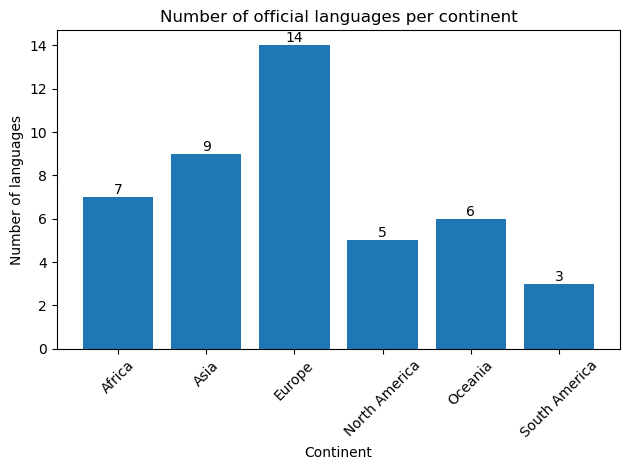

In [23]:
plt.figure()
bars = plt.bar(no_of_languages_per_continent.index, no_of_languages_per_continent.values)
plt.xlabel("Continent")
plt.ylabel("Number of languages")
plt.title("Number of official languages per continent")
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        int(height),
        ha='center',
        va='bottom'
    )
plt.xticks(rotation=45)
plt.tight_layout()

#### List all official languages in Africa

In [24]:
official_languages_africa = (
    data[
        (data["IsOfficial"] == "T") &
        (data["Continent"] == "Africa")
    ]["Language"]
    .unique()
)

print(f"Official languages in Africa: {', '.join(official_languages_africa)}")

Official languages in Africa: Arabic, French, Afrikaans, Comorian, English, Chichewa, Swazi


### Lets count the number  of langauges per countries in africa 

In [25]:
number_official = (
    data[
        (data["IsOfficial"] == "T") &
        (data["Continent"] == "Africa")
    ]
    .groupby("Country_Name")["Language"]
    .nunique()
    .sort_values(ascending=False)
)

print(number_official)


Country_Name
Algeria                   1
Rwanda                    1
Western Sahara            1
Tunisia                   1
Swaziland                 1
Sudan                     1
South Africa              1
Somalia                   1
Seychelles                1
Saint Helena              1
Morocco                   1
Burundi                   1
Mayotte                   1
Malawi                    1
Madagascar                1
Libyan Arab Jamahiriya    1
Lesotho                   1
Egypt                     1
Comoros                   1
Chad                      1
Zimbabwe                  1
Name: Language, dtype: int64


### list all English speaking countries  in africa

In [26]:
English_speaking_countries_in_Africa= (
    data[
        (data["Language"] == "English") &
        (data["IsOfficial"] == "T") & (data["Continent"] == "Africa")
    ]["Country_Name"]
    .unique()
)
print(English_speaking_countries_in_Africa)

['Lesotho' 'Saint Helena' 'Seychelles' 'Zimbabwe']


### Which are the official languages in Europe

In [27]:
official_languages_Europe= (
    data[
        (data["Continent"] == "Europe") &
        (data["IsOfficial"] == "T")
    ]["Language"]
    .unique()
)
print(official_languages_Europe)

['Albaniana' 'Catalan' 'Serbo-Croatian' 'English' 'Bulgariana' 'Danish'
 'Norwegian' 'Greek' 'German' 'French' 'Portuguese' 'Italian' 'Czech'
 'Belorussian']


### Count the official languages per countries in Europe

In [28]:
official_langauages_per_counry_Europe = (
    data[
        (data["Continent"] == "Europe") &
        (data["IsOfficial"] == "T")
    ].groupby("Country_Name")["Language"]
    .nunique()
    )
print(official_langauages_per_counry_Europe)

Country_Name
Albania                          1
Andorra                          1
Belarus                          1
Bosnia and Herzegovina           1
Bulgaria                         1
Croatia                          1
Czech Republic                   1
Faroe Islands                    1
Germany                          1
Greece                           1
Holy See (Vatican City State)    1
Ireland                          1
Liechtenstein                    1
Luxembourg                       1
Malta                            1
Portugal                         1
San Marino                       1
Svalbard and Jan Mayen           1
Switzerland                      1
United Kingdom                   1
Name: Language, dtype: int64


### List countries in the continet of Asia

In [29]:
counries_in_asia= (
    data[
        (data["Continent"] == "Asia")
    ]["Country_Name"]
    .unique()
)
print(counries_in_asia)

['Afghanistan' 'United Arab Emirates' 'Armenia' 'Azerbaijan' 'Bahrain'
 'Bangladesh' 'Bhutan' 'Brunei' 'Philippines' 'Georgia' 'Hong Kong'
 'Indonesia' 'India' 'Iraq' 'Iran' 'Israel' 'East Timor' 'Japan' 'Yemen'
 'Jordan' 'Cambodia' 'Kazakstan' 'China' 'Kyrgyzstan' 'North Korea'
 'South Korea' 'Kuwait' 'Cyprus' 'Laos' 'Lebanon' 'Macao' 'Maldives'
 'Malaysia' 'Mongolia' 'Myanmar' 'Nepal' 'Oman' 'Pakistan' 'Qatar'
 'Saudi Arabia' 'Singapore' 'Sri Lanka' 'Syria' 'Tajikistan' 'Taiwan'
 'Thailand' 'Turkey' 'Turkmenistan' 'Uzbekistan' 'Vietnam' 'Palestine']


### Which are the offical Langaues in  ASIA

In [30]:
official_languages_in_ASIA = (
    data[
        (data["Continent"] == "Asia") &
        (data["IsOfficial"] == "T")
    ]["Language"]
    .unique()
)
print(official_languages_in_ASIA)

['Arabic' 'Armenian' 'Bengali' 'Portuguese' 'Chinese' 'Greek' 'Lao'
 'Dhivehi' 'Burmese']


### Which are the countries in North America

In [31]:
countries_in_north_america = (
    data[
        (data["Continent"] == "North America")
    ]["Country_Name"]
    .unique()
)
print(countries_in_north_america)

['Netherlands Antilles' 'Anguilla' 'Antigua and Barbuda' 'Aruba' 'Bahamas'
 'Barbados' 'Belize' 'Bermuda' 'Virgin Islands, British' 'Cayman Islands'
 'Costa Rica' 'Dominica' 'Dominican Republic' 'El Salvador' 'Grenada'
 'Greenland' 'Guadeloupe' 'Guatemala' 'Haiti' 'Honduras' 'Jamaica'
 'Canada' 'Cuba' 'Martinique' 'Mexico' 'Montserrat' 'Nicaragua' 'Panama'
 'Puerto Rico' 'Saint Kitts and Nevis' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Saint Pierre and Miquelon'
 'Trinidad and Tobago' 'Turks and Caicos Islands' 'United States'
 'Virgin Islands, U.S.']


### List the offical languages in North America

In [32]:
official_languages_in_north_america = ( 
    data[
        (data["Continent"] == "North America") &
        (data["IsOfficial"] == "T")
    ]["Language"]
    .unique()
)
print(official_languages_in_north_america)

['Dutch' 'English' 'Danish' 'French' 'Spanish']


#### The  countries in oceania

In [33]:
countries_in_oceania = (
    data[
        (data["Continent"] == "Oceania")
    ]["Country_Name"]
    .unique()
)   
print(countries_in_oceania)

['American Samoa' 'Australia' 'Cook Islands' 'Fiji Islands' 'Guam'
 'Christmas Island' 'Kiribati' 'Cocos (Keeling) Islands'
 'Marshall Islands' 'Micronesia, Federated States of' 'Nauru' 'Niue'
 'Norfolk Island' 'Palau' 'Papua New Guinea' 'Pitcairn'
 'Northern Mariana Islands' 'French Polynesia' 'Solomon Islands' 'Samoa'
 'Tokelau' 'Tonga' 'Tuvalu' 'New Caledonia' 'New Zealand'
 'Wallis and Futuna' 'Vanuatu']


### Which are the official languages in oceania

In [34]:
offical_lanuages_Oceania = (
    data[
        (data["Continent"] == "Oceania") &
        (data["IsOfficial"] == "T")
    ]["Language"]
    .unique()
)
print(offical_lanuages_Oceania)

['English' 'Fijian' 'Chamorro' 'Kiribati' 'French' 'Bislama']


### Which are the countries in south america

In [35]:
countries_in_south_america = ( 
    data[
        (data["Continent"] == "South America")
    ]["Country_Name"]
    .unique()
)
print(countries_in_south_america)   

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Ecuador' 'Falkland Islands'
 'Guyana' 'Colombia' 'Paraguay' 'Peru' 'French Guiana' 'Suriname'
 'Uruguay' 'Venezuela']


## Which are the oficial lanuages in South America

In [36]:
official_languages_south_america = (
    data[
        (data["Continent"] == "South America") &
        (data["IsOfficial"] == "T")
    ]["Language"]
    .unique()
)
print(official_languages_south_america) 

['Aimará' 'English' 'Spanish']


### Count the number of countries per region

In [37]:
countries_per_region = (
    data.groupby("Region")["Country_Name"]
    .nunique()
    .reset_index(name="Number_of_Countries")
)
print(countries_per_region) 

                       Region  Number_of_Countries
0   Australia and New Zealand                    5
1            Baltic Countries                    3
2             British Islands                    2
3                   Caribbean                   24
4              Central Africa                    9
5             Central America                    8
6              Eastern Africa                   19
7                Eastern Asia                    8
8              Eastern Europe                   10
9                   Melanesia                    5
10                 Micronesia                    7
11                Middle East                   18
12           Nordic Countries                    7
13              North America                    5
14            Northern Africa                    7
15                  Polynesia                   10
16              South America                   14
17             Southeast Asia                   11
18            Southern Africa  

### Build a visual to show case 

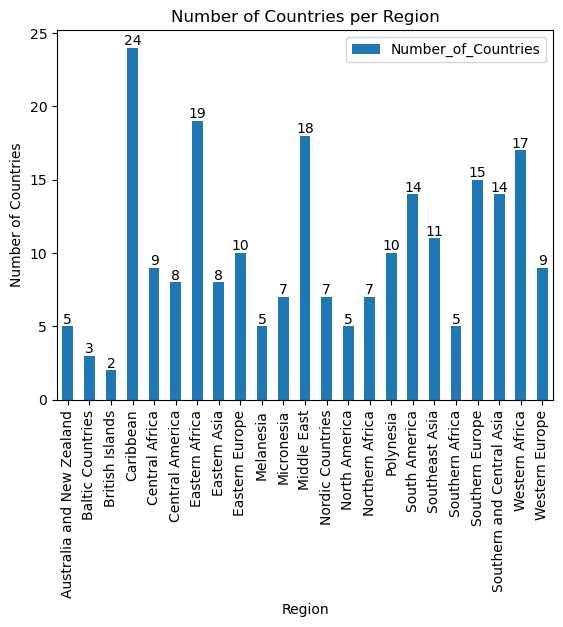

In [38]:
countries_per_region.plot(
    x="Region",
    y="Number_of_Countries",
    kind="bar"
)
### Add data labels
bars = plt.gca().patches
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}',
             ha='center', va='bottom')
plt.title("Number of Countries per Region")
plt.ylabel("Number of Countries")
plt
plt.show()

### Total languages per regions 

In [39]:
languages_per_region = (
    data.groupby("Region")["Language"]
    .nunique()
    .reset_index(name="Number_of_Languages")
)
print(languages_per_region)

                       Region  Number_of_Languages
0   Australia and New Zealand                    3
1            Baltic Countries                    1
2             British Islands                    1
3                   Caribbean                    7
4              Central Africa                    9
5             Central America                    7
6              Eastern Africa                   14
7                Eastern Asia                    5
8              Eastern Europe                    6
9                   Melanesia                    4
10                 Micronesia                    6
11                Middle East                    4
12           Nordic Countries                    5
13              North America                    4
14            Northern Africa                    1
15                  Polynesia                    4
16              South America                   10
17             Southeast Asia                    6
18            Southern Africa  

### List all the langauges in the carrebean region

In [40]:
languages_carrebean = (
    data[
        (data["Region"] == "Caribbean") &
        (data["IsOfficial"] == "T")
    ]["Language"]
    .unique()
)
print(languages_carrebean)

['Dutch' 'English' 'French' 'Spanish']


### Which are these carreabean and their official languages

In [41]:
carreabean_countries = (
    data[
        data["Region"] == "Caribbean"]
        .groupby("Country_Name")["Language"]
        .count()
        .reset_index(name="Number_of_Languages")
        .query("Number_of_Languages > 0")
    
)
print(carreabean_countries)

                        Country_Name  Number_of_Languages
0                           Anguilla                    2
1                Antigua and Barbuda                    1
2                              Aruba                    1
3                            Bahamas                    1
4                           Barbados                    1
5                     Cayman Islands                    1
6                               Cuba                   14
7                           Dominica                    1
8                 Dominican Republic                    6
9                            Grenada                    1
10                        Guadeloupe                    2
11                             Haiti                    4
12                           Jamaica                    3
13                        Martinique                    1
14                        Montserrat                    1
15              Netherlands Antilles                    1
16            

### Which are the countries in East Africa

In [42]:
eastafrica_countries = (
    data[
        data["Region"] == "Eastern Africa"]
        .groupby("Country_Name")["Language"]
        .count()
        .reset_index(name="Number_of_Languages")
        .query("Number_of_Languages > 0")
    
)
print(eastafrica_countries)

   Country_Name  Number_of_Languages
0       Burundi                    1
1       Comoros                    1
2      Djibouti                    1
3       Eritrea                    1
4      Ethiopia                    7
5         Kenya                    8
6    Madagascar                    5
7        Malawi                    2
8     Mauritius                    3
9       Mayotte                    1
10   Mozambique                   12
11       Rwanda                    1
12      Réunion                    1
13   Seychelles                    1
14      Somalia                    3
15     Tanzania                   10
16       Uganda                    1
17       Zambia                    7
18     Zimbabwe                    6


### What is the average life expectancy per region

In [43]:
average_life_expectancy_per_region = (
    data.groupby("Region")["LifeExpectancy"]
    .mean()
    .reset_index(name="Average_Life_Expectancy")    
)
print(average_life_expectancy_per_region)   

                       Region  Average_Life_Expectancy
0   Australia and New Zealand                79.017391
1            Baltic Countries                68.970000
2             British Islands                77.678313
3                   Caribbean                72.998276
4              Central Africa                49.007895
5             Central America                71.302551
6              Eastern Africa                46.666667
7                Eastern Asia                75.102162
8              Eastern Europe                68.394609
9                   Melanesia                67.140000
10                 Micronesia                67.600000
11                Middle East                70.271839
12           Nordic Countries                78.517647
13              North America                77.417431
14            Northern Africa                66.053922
15                  Polynesia                71.787500
16              South America                67.464392
17        

### Visualise life expentancy per region

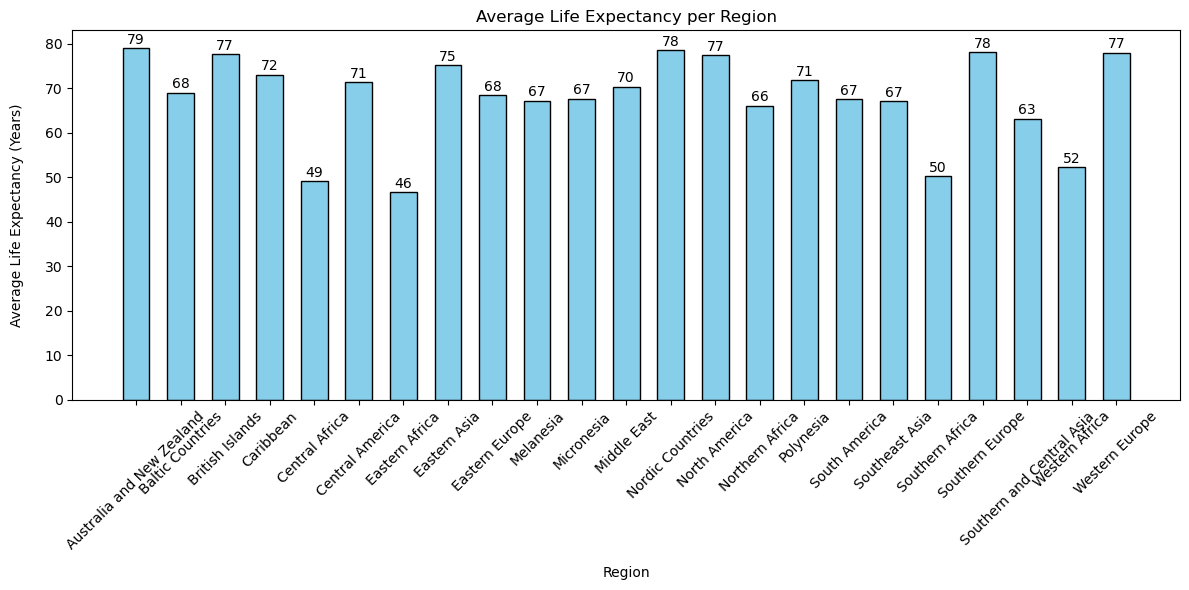

In [44]:
plt.figure(figsize=(12,6))

bars = plt.bar(
    average_life_expectancy_per_region["Region"],   
    average_life_expectancy_per_region["Average_Life_Expectancy"],
    width=0.6,       # thinner bars for spacing
    color='skyblue',
    edgecolor='black'
)

plt.xlabel("Region", labelpad=10)
plt.ylabel("Average Life Expectancy (Years)", labelpad=15)  # Move y-label away
plt.title("Average Life Expectancy per Region")

# Add labels on top of bars
for bar in bars:    
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.3,   # small offset so label doesn't touch the bar
        int(height),
        ha='center',
        va='bottom'
    )

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show() 

### Which continet haas the highest population

In [45]:
continent_highest_population = (
    data.groupby("Continent")["Country_population"]
    .sum()
    .reset_index(name="Total_Population")
    .sort_values(by="Total_Population", ascending=False)       
)
print(continent_highest_population) 

       Continent  Total_Population
1           Asia      900937599400
3  North America       95330838000
2         Europe       55118944000
5  South America       48533025000
0         Africa       16179610000
4        Oceania         307500750


### Lets plot a line chart 

       Continent  Total_Surface_Area
1           Asia        5.282393e+09
2         Europe        3.428231e+09
3  North America        3.398888e+09
5  South America        2.441954e+09
0         Africa        3.567188e+08
4        Oceania        1.113706e+08


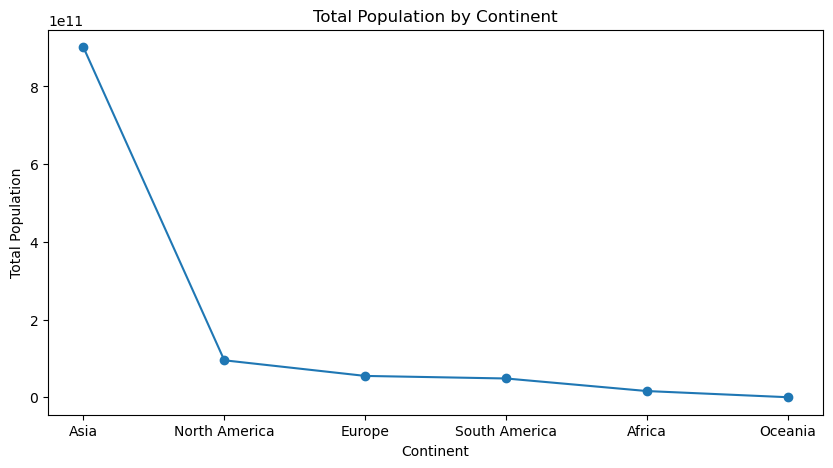

In [46]:
plt.figure(figsize=(10,5))
plt.plot(continent_highest_population["Continent"], continent_highest_population["Total_Population"], marker='o')
plt.xlabel("Continent")     
plt.ylabel("Total Population")
plt.title("Total Population by Continent")  
continet_with_largest_surface_area = (
    data.groupby("Continent")["SurfaceArea"] 
    .sum()
    .reset_index(name="Total_Surface_Area")
    .sort_values(by="Total_Surface_Area", ascending=False)
)
print(continet_with_largest_surface_area)

### Which continet has the largest surface area

In [47]:
continet_with_largest_surface_area = (
    data.groupby("Continent")["SurfaceArea"] 
    .sum()
    .reset_index(name="Total_Surface_Area")
    .sort_values(by="Total_Surface_Area", ascending=False)
)
print(continet_with_largest_surface_area)   

       Continent  Total_Surface_Area
1           Asia        5.282393e+09
2         Europe        3.428231e+09
3  North America        3.398888e+09
5  South America        2.441954e+09
0         Africa        3.567188e+08
4        Oceania        1.113706e+08


### Plot a line chart for total surface area.

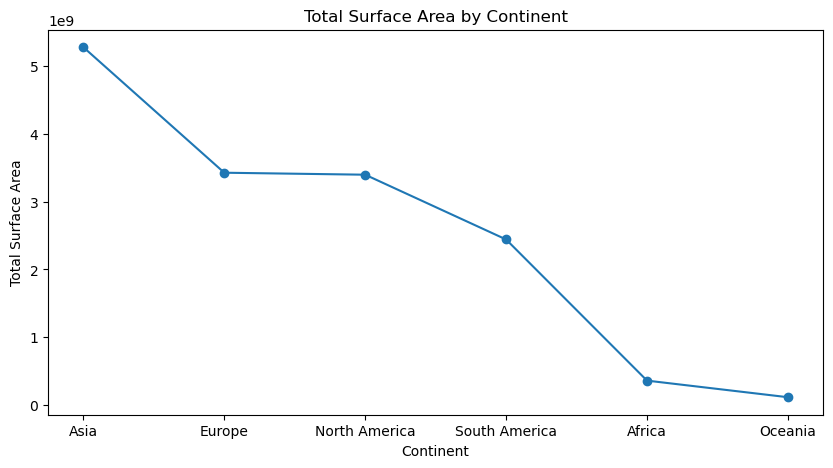

In [48]:
plt.figure(figsize=(10,5))
plt.plot(continet_with_largest_surface_area["Continent"], continet_with_largest_surface_area["Total_Surface_Area"], marker='o')
plt.xlabel("Continent")
plt.ylabel("Total Surface Area")
plt.title("Total Surface Area by Continent")
plt.show()

### Creating machine learning models

1. Load the remaining libraries

In [49]:
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")


### Set style for better visualization

In [50]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


### Feature Engineering

1. Create new features

In [81]:
def fill_missing_values(data):
    """Fill missing values with appropriate statistics"""
    data = data.copy()                      # Never modify original
    
    data['IndepYear']      = data['IndepYear'].fillna(data['IndepYear'].median())
    data['LifeExpectancy'] = data['LifeExpectancy'].fillna(data['LifeExpectancy'].mean())
    data['GNP']            = data['GNP'].fillna(data['GNP'].median())          # corrected
    data['GNPOld']         = data['GNPOld'].fillna(0)
    
    return data


In [82]:
def create_core_features(data):
    """Create the main engineered features"""
    data = data.copy()
    
    data['GNP_per_capita'] = data['GNP'] / data['Country_population'].clip(lower=1)
    data['pop_density']    = data['Country_population'] / data['SurfaceArea'].clip(lower=1)
    data['GNP_growth']     = data['GNP'] - data['GNPOld']
    
    return data

In [84]:
def add_aggregates(country_df, city_df, lang_df):
    data = country_df.copy()
    
    lang_count = lang_df.groupby('CountryCode')['Language']\
                        .nunique()\
                        .reindex(data['Code'])\
                        .fillna(0)\
                        .astype(int).values
    
    city_count = city_df.groupby('CountryCode').size()\
                        .reindex(data['Code'])\
                        .fillna(0)\
                        .astype(int).values
    
    avg_city = city_df.groupby('CountryCode')['City_population']\
                      .mean()\
                      .reindex(data['Code'])\
                      .fillna(0).values
    
    data['num_languages'] = lang_count
    data['num_cities']    = city_count
    data['avg_city_pop']  = avg_city
    
    return data

In [86]:
def engineer_all_features(country_df, city_df, lang_df):
    df = fill_missing_values(country_df)
    df = create_core_features(df)
    df = add_aggregates(df, city_df, lang_df)
    print(f"Final shape: {df.shape}")
    print("New columns:", [c for c in df.columns if c not in country_df.columns])
    return df

In [87]:
df_final = engineer_all_features(country, city, countryLanguage)

df_final.head(3)

Final shape: (239, 21)
New columns: ['GNP_per_capita', 'pop_density', 'GNP_growth', 'num_languages', 'num_cities', 'avg_city_pop']


,Code,Country_Name,Continent,Region,SurfaceArea,IndepYear,Country_population,LifeExpectancy,GNP,GNPOld,...,GovernmentForm,HeadOfState,Capital,Code2,GNP_per_capita,pop_density,GNP_growth,num_languages,num_cities,avg_city_pop
0,ABW,Aruba,North America,Caribbean,193.0,1960.0,103000,78.4,828.0,793.0,...,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW,0.008039,533.678756,35.0,4,1,29034.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,0.0,...,Islamic Emirate,Mohammad Omar,1.0,AF,0.000263,34.841816,5976.0,5,4,583025.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,...,Republic,José Eduardo dos Santos,56.0,AO,0.000516,10.329670,-1336.0,9,5,512320.0


Define Features & target + train/test split

In [89]:
features = [
    'Continent', 'Region',
    'SurfaceArea', 'IndepYear',
    'Country_population', 'GNP', 'GNP_per_capita',
    'pop_density', 'GNP_growth',
    'num_languages', 'num_cities', 'avg_city_pop'
]
target = 'LifeExpectancy'

X = df_final[features].copy()
y = df_final[target].copy()

## Train / test split

X_train, X_test, y_train,y_test =train_test_split(
X,y,
test_size =0.20,
random_state = 42

)
print(f"Train: {X_train.shape[0]:,} rows")
print(f"Test: {X_test.shape[0]:,} rows")

Train: 191 rows
Test: 48 rows


Create preprocesssing pipeline 